# Deep Learning

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

2024-04-10 18:43:43.136221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [171]:
df = pd.read_csv('DeepLearning2.csv')

In [172]:
df.head(15)

census_year               clue_small_area  Total_cafe  \
0          2002                       Carlton         241   
1          2002                     Docklands          24   
2          2002                East Melbourne          39   
3          2002                    Kensington           8   
4          2002               Melbourne (CBD)        1072   
5          2002         Melbourne (Remainder)          37   
6          2002               North Melbourne          79   
7          2002                     Parkville          30   
8          2002                Port Melbourne           3   
9          2002                   South Yarra          10   
10         2002                     Southbank         100   
11         2002   West Melbourne (Industrial)          13   
12         2002  West Melbourne (Residential)          50   
13         2003                       Carlton         274   
14         2003                     Docklands          50   

    accommodation_and_food_services  administrative_and_support_services  \
0                               190                                   40   
1                                23                                    6   
2                                54                                   22   
3                                12                                    1   
4                               993                                  489   
5                                24                                   24   
6                                84                                   32   
7                                51                                    3   
8                                 4                                    6   
9                                15                                    1   
10                               91                                   19   
11                               10                                    4   
12                               44                                   31   
13                              202                                   38   
14                               36                                    5   

    agriculture_forestry_and_fishing  arts_and_recreation_services  \
0                                  0                            31   
1                                  1                             9   
2                                  0                            42   
3                                  0                            60   
4                                  7                            92   
5                                  1                            36   
6                                  2                            37   
7                                  0                            24   
8                                  0                             9   
9                                  0                             4   
10                                 2                            38   
11                                 1                             5   
12                                 0                            19   
13                                 0                            36   
14                                 1                             9   

    construction  education_and_training  \
0             13                      61   
1              4                       1   
2              4                      12   
3              2                       2   
4             68                     143   
5              5                       8   
6             20                      14   
7              0                       7   
8             11                       2   
9              0                      12   
10             8                      10   
11             6                       0   
12            11                       9   
13            12                      68   
14             4             

## Deep learning: Target is the New_cafe and the features are from total cafe to total dwelling

In [173]:
# Encoding the Clue Small Area
le = LabelEncoder()
# Standdardising the features
scaler = StandardScaler()

In [174]:
# Encoding the Clue Small Area
le = LabelEncoder()
feature = df.loc[(df['census_year']<2022)&(df['clue_small_area']=='Carlton'),:].drop(columns=['census_year','clue_small_area','New_food_services'])


In [175]:
# Standdardising the features
scaler = StandardScaler()
feature = scaler.fit_transform(feature)

In [176]:
target = df.loc[(df['census_year']< 2022)&(df['clue_small_area']=='Carlton'),'New_food_services']

In [9]:
feature = feature.astype(np.float32)
target = target.astype(np.float32)

In [10]:
# Traing split
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size =0.2, random_state = 42 )

In [11]:
x_train.shape

(16, 22)

In [12]:
y_test

0      12.0
221    27.0
195    63.0
13      0.0
Name: New_food_services, dtype: float32

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                253       
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 328
Trainable params: 328
Non-trainable params: 0
_________________________________________________________________


2024-04-10 18:44:54.157704: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


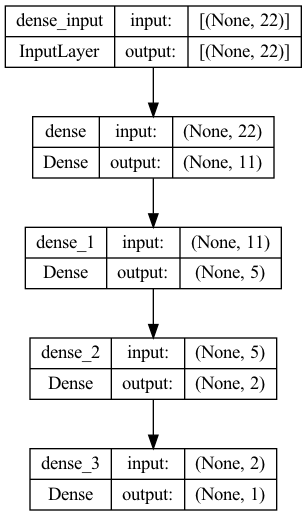

In [13]:
model = models.Sequential([
    layers.Dense(11, activation='elu', input_shape=(22, )),
    layers.Dense(5, activation ='tanh'),
    layers.Dense(2, activation ='elu'),
    layers.Dense(1, activation='linear')])

model.summary()

tf.keras.utils.plot_model(model, show_shapes = True)

In [332]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(0.008),
    loss= tf.keras.losses.MeanAbsoluteError(),
    metrics= [tf.keras.metrics.MeanSquaredError()],
)
int_weights = model.get_weights()

network = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 1,
    epochs=200
)

Epoch 1/200
16/16 [==============================] - 0s 1ms/step - loss: 8.2926 - mean_squared_error: 190.7766
Epoch 2/200
16/16 [==============================] - 0s 1ms/step - loss: 8.1726 - mean_squared_error: 185.7467
Epoch 3/200
16/16 [==============================] - 0s 1ms/step - loss: 8.1841 - mean_squared_error: 184.7403
Epoch 4/200
16/16 [==============================] - 0s 1ms/step - loss: 8.1238 - mean_squared_error: 185.1107
Epoch 5/200
16/16 [==============================] - 0s 1ms/step - loss: 8.0851 - mean_squared_error: 184.6027
Epoch 6/200
16/16 [==============================] - 0s 1ms/step - loss: 8.0501 - mean_squared_error: 184.2518
Epoch 7/200
16/16 [==============================] - 0s 2ms/step - loss: 8.0097 - mean_squared_error: 184.2742
Epoch 8/200
16/16 [==============================] - 0s 1ms/step - loss: 7.9855 - mean_squared_error: 184.3136
Epoch 9/200
16/16 [==============================] - 0s 2ms/step - loss: 7.9999 - mean_squared_error: 182.8266
E

In [333]:
loss, mse = model.evaluate(x_train, y_train)
print(f'Final Loss: {loss:.4f}, Mean Squared Error: {mse:.4f}')

1/1 [==============================] - 0s 100ms/step - loss: 2.5203 - mean_squared_error: 28.0787
Final Loss: 2.5203, Mean Squared Error: 28.0787


In [334]:
loss, mse = model.evaluate(x_test, y_test)
print(f'Final Loss: {loss:.4f}, Mean Squared Error: {mse:.4f}')

1/1 [==============================] - 0s 22ms/step - loss: 2.1749 - mean_squared_error: 13.9791
Final Loss: 2.1749, Mean Squared Error: 13.9791


In [190]:
def model_call(data,col,epochs,adam,first,second,third):
        feature = df.loc[(df['census_year']<2022)&(df['clue_small_area']==col),:].drop(columns=
                                                                                             ['census_year','clue_small_area','New_food_services','accommodation_and_food_services','mining','agriculture_forestry_and_fishing','total_establishments_in_block','wholesale_trade','transport_postal_and_warehousing'])
        feature = scaler.fit_transform(feature)
        target = df.loc[(df['census_year']< 2022)&(df['clue_small_area']==col),'accommodation_and_food_services']
        
        feature = feature.astype(np.float32)
        
    # Standardising the target values
        mean = np.mean(target)
        std_dev = np.std(target)
        target = (target - mean)/std_dev
        target = target.astype(np.float32)
    # Splitting the data into training and testing
        x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size =0.3, random_state = 42 )
        print(x_train.shape)
        model = models.Sequential([
            layers.Dense(10, activation=first, input_shape=(16, )),
            layers.Dense(5, activation =second),
            layers.Dense(1, activation=third)])
    # Compiling the data
    
        model.compile(
            optimizer= tf.keras.optimizers.Adam(adam),
            loss= tf.keras.losses.MeanSquaredLogarithmicError(),
            metrics= [tf.keras.metrics.MeanAbsoluteError()],
            )
    
        int_weights = model.get_weights()

        network = model.fit(
            x = x_train,
            y = y_train,
            batch_size = 2,
            epochs=epochs
        )
        
        #print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')
        #print(f'1. {first}, second {second}')
        y_pred = network.model.predict(x_test)
        #print(f'Model building for area: {col}')
        #print("Model evaluation:")
        #print('Training:')
        loss, mse = model.evaluate(x_train, y_train)
        #print(f'Final Loss: {loss:.4f}, Mean: {mse}')
        #print('Test data:')
        losst, mset = model.evaluate(x_test, y_test)
        #print(f'Final Loss: {losst:.4f}, Mean: {mset}')
        #model.summary()
        #print(y_pred)
        #print(y_test)
        #tf.keras.utils.plot_model(model, show_shapes = True)
        return first,second,third,loss,mse,losst,mset,y_pred,y_test

#network_Carlton = model_call(df,'Carlton',10,0.0001)

# Trying without scaling the data

In [129]:
data=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.001,'relu',y,x)
        data.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])


(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 26.2750 - mean_absolute_error: 251.2627
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 26.2053 - mean_absolute_error: 249.1915
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 26.1747 - mean_absolute_error: 248.7284
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 26.1524 - mean_absolute_error: 248.5201
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 26.1348 - mean_absolute_error: 248.1685
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 26.1204 - mean_absolute_error: 247.7263
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 26.1078 - mean_absolute_error: 247.5839
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 26.0970 - mean_absolute_error: 247.2177
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 26.0873 - mean_absolute_error: 246.9915
E

In [157]:
def plot_data(data):
    loss = [row[5] for row in data]
    x_values = list(range(1, len(data) + 1))
    # Plotting
    plt.plot(x_values, loss, marker='o',label='Loss')
    plt.xlabel('Index')
    plt.ylabel('Test Loss Values')
    plt.title('Plot of Test Loss values')

    metric = [row[6] for row in data]
    x_values_m = list(range(1, len(data) + 1))
    # Plotting
    plt.plot(x_values_m, metric, marker='x',label='Metric')
    plt.xlabel('Index')
    plt.ylabel('Test Loss and Metric Values')
    plt.title('Plot of Test Results')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Find the minimum value in the 3rd column
    min_value = min(row[6] for row in data)

    # Collect the lists that contain the minimum value in the 3rd column
    lists_with_min_value = [row for row in data if row[6] == min_value]
    print(f'Activation functions: {lists_with_min_value[0][0]}, {lists_with_min_value[0][1]}, {lists_with_min_value[0][2]}')
    print(f'Loss function: {lists_with_min_value[0][5]} and metric: {lists_with_min_value[0][6]}')
    print(f'Actual value: {lists_with_min_value[0][8].values}')
    plt.plot(lists_with_min_value[0][7], marker='x',label='Predicted')
    plt.plot(lists_with_min_value[0][8].values, marker='o',label='Actual')
    plt.xlabel('Index')
    plt.ylabel('Target values')
    plt.title('Comparing the predicted and actual values')
    plt.grid(True)
    plt.legend()
    plt.show()


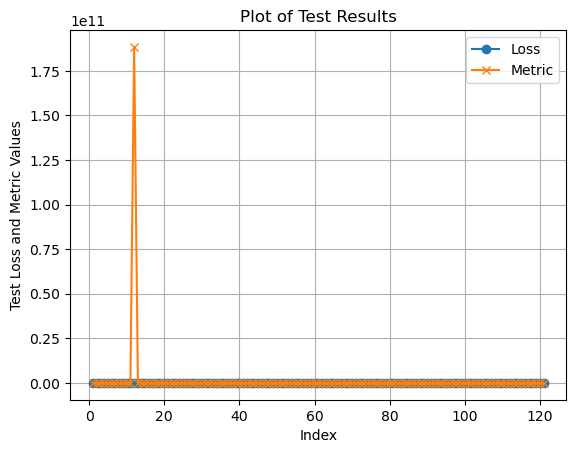

Activation functions: relu, elu, gelu
Loss function: 1.4616588354110718 and metric: 108.3261489868164
Actual value: [190. 327. 291. 202. 253. 239.]


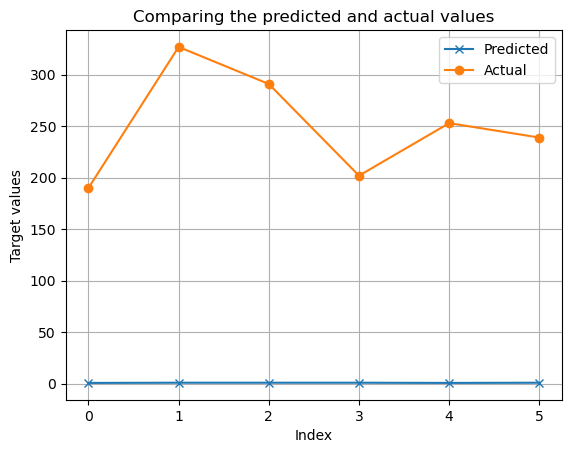

In [158]:
plot_data(data)

In [159]:
data2=[]
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.001,'elu',y,x)
        data2.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.3571
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
E

KeyboardInterrupt: 

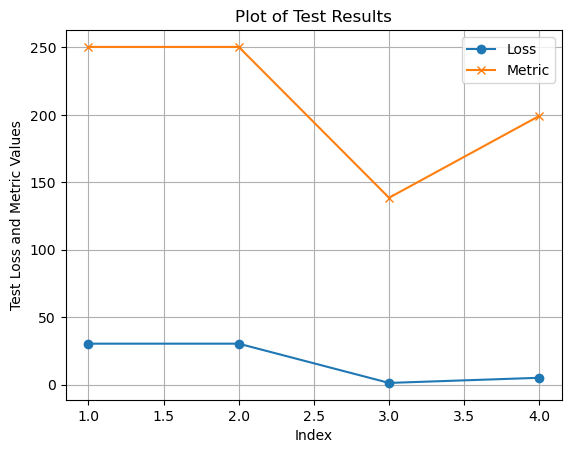

Activation functions: elu, gelu, elu
Loss function: 1.2940865755081177 and metric: 138.53936767578125
Actual value: [190. 327. 291. 202. 253. 239.]


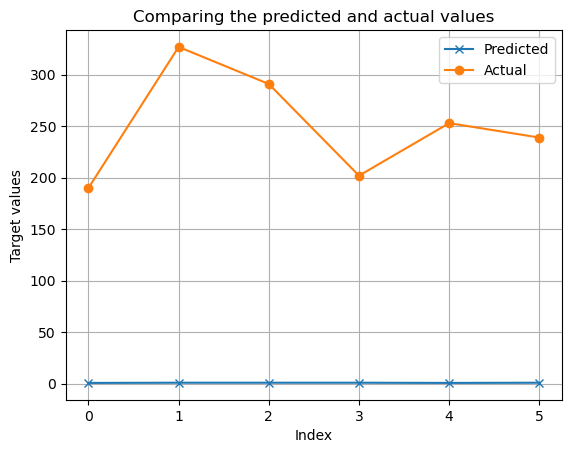

In [160]:
plot_data(data2)

In [162]:
data3=[]
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.001,'gelu',y,x)
        data3.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 4.5899 - mean_absolute_error: 221.1450
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 4.3334 - mean_absolute_error: 226.3516
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 4.0682 - mean_absolute_error: 224.0088
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 3.8750 - mean_absolute_error: 222.2043
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 3.7178 - mean_absolute_error: 220.7539
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 3.5843 - mean_absolute_error: 219.3002
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 3.4673 - mean_absolute_error: 218.1334
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 3.3644 - mean_absolute_error: 216.9839
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 3.2726 - mean_absolute_error: 215.8230
Epoch 10/1

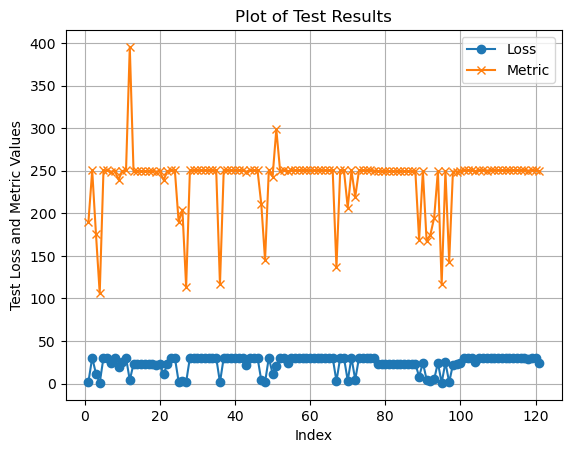

Activation functions: gelu, leaky_relu, elu
Loss function: 0.8304936289787292 and metric: 105.86774444580078
Actual value: [190. 327. 291. 202. 253. 239.]


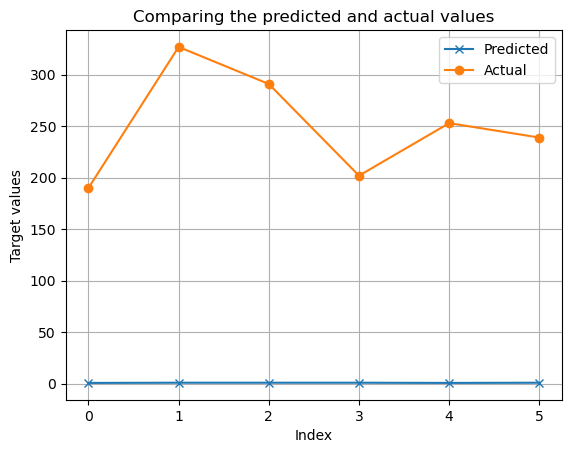

In [163]:
plot_data(data3)

In [164]:
data4=[]
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'linear',y,x)
        data4.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 1.9737 - mean_absolute_error: 194.8441
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 1.5104 - mean_absolute_error: 185.6779
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 1.3246 - mean_absolute_error: 179.7452
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 1.2026 - mean_absolute_error: 175.2419
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 1.1103 - mean_absolute_error: 171.3354
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 1.0368 - mean_absolute_error: 167.9947
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.9752 - mean_absolute_error: 165.0099
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.9223 - mean_absolute_error: 162.2558
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.8769 - mean_absolute_error: 159.6733
Epoch 10/1

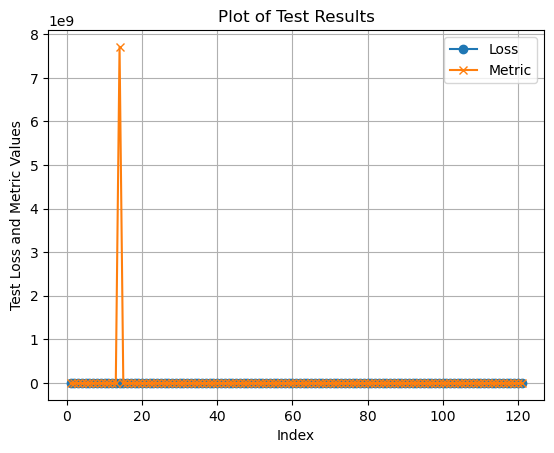

Activation functions: linear, elu, linear
Loss function: 0.42397841811180115 and metric: 88.4921875
Actual value: [190. 327. 291. 202. 253. 239.]


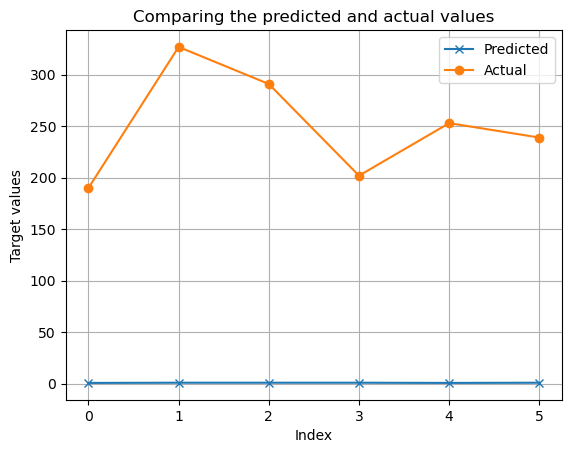

In [165]:
plot_data(data4)

In [166]:
data4

[['linear',
  'elu',
  'elu',
  0.8147473335266113,
  156.00416564941406,
  0.7259911894798279,
  141.52557373046875,
  array([[0.7861125 ],
         [0.9864165 ],
         [0.98612934],
         [0.982183  ],
         [0.7957193 ],
         [0.9810899 ]], dtype=float32),
  0      190.0
  221    327.0
  195    291.0
  13     202.0
  104    253.0
  65     239.0
  Name: accommodation_and_food_services, dtype: float32],
 ['linear',
  'exponential',
  'elu',
  30.676525115966797,
  261.21429443359375,
  30.383424758911133,
  250.3333282470703,
  array([[0.7861125 ],
         [0.9864165 ],
         [0.98612934],
         [0.982183  ],
         [0.7957193 ],
         [0.9810899 ]], dtype=float32),
  0      190.0
  221    327.0
  195    291.0
  13     202.0
  104    253.0
  65     239.0
  Name: accommodation_and_food_services, dtype: float32],
 ['linear',
  'gelu',
  'elu',
  11.409334182739258,
  251.58338928222656,
  9.596938133239746,
  235.8297119140625,
  array([[0.7861125 ],
         [0

In [167]:
data5=[]
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'exponential',y,x)
        data5.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: nan - mean_absolute_error: nan
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 30.6765 - mean_absolute_error: 261.2143
Epoch 10/1

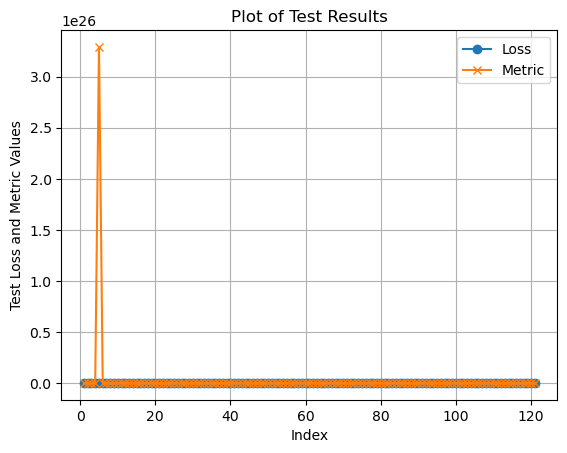

Activation functions: exponential, tanh, gelu
Loss function: 20.080873489379883 and metric: 248.5275115966797
Actual value: [190. 327. 291. 202. 253. 239.]


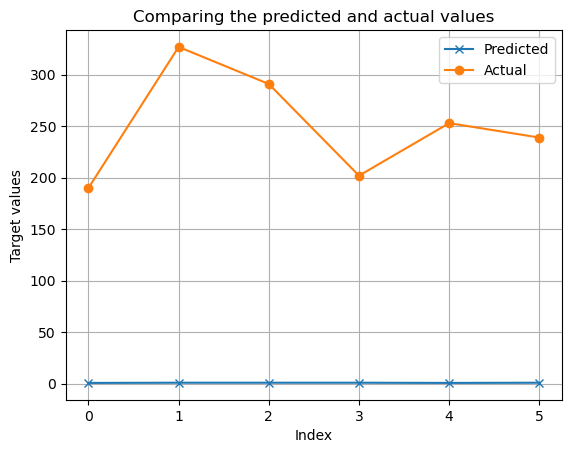

In [168]:
plot_data(data5)

In [169]:
data6=[]
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'tanh',y,x)
        data6.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 22.0367 - mean_absolute_error: 259.6942
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 19.5168 - mean_absolute_error: 259.1443
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 19.3628 - mean_absolute_error: 259.0896
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 19.2569 - mean_absolute_error: 259.0514
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 19.1730 - mean_absolute_error: 259.0206
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 19.1012 - mean_absolute_error: 258.9940
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 19.0355 - mean_absolute_error: 258.9695
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 18.9788 - mean_absolute_error: 258.9483
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 18.9325 - mean_absolute_error: 258.9307
E

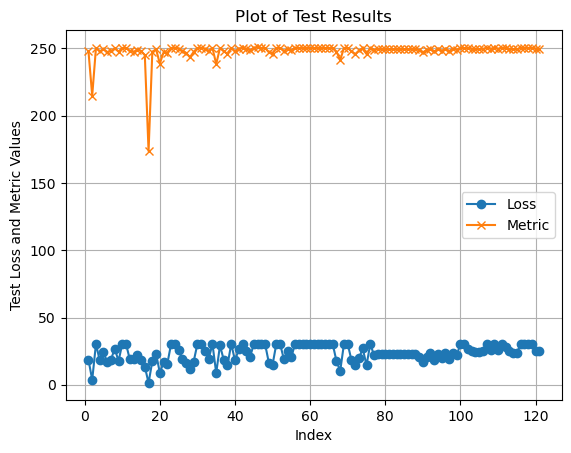

Activation functions: tanh, log_softmax, exponential
Loss function: 1.3821905851364136 and metric: 173.68621826171875
Actual value: [190. 327. 291. 202. 253. 239.]


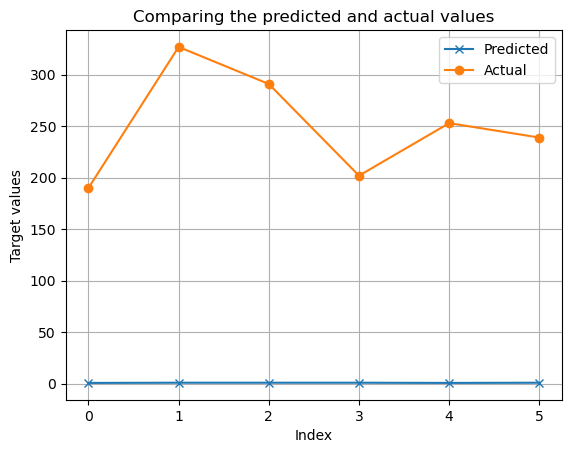

In [170]:
plot_data(data6)

# Working with scaled data

In [178]:
data7=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'relu',y,x)
        data7.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8774
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2553 - mean_absolute_error: 0.8863
Epoch 10/10
1/1 [===========

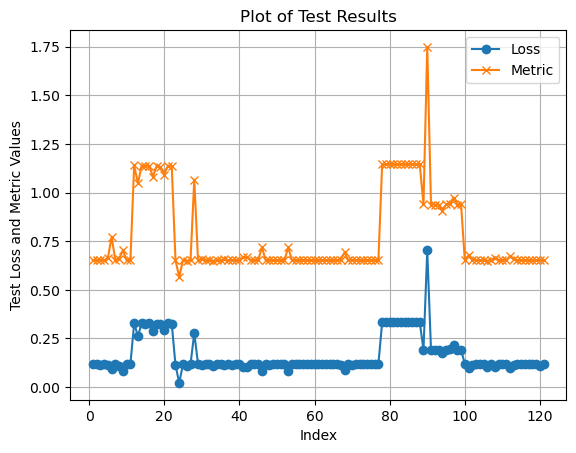

Activation functions: relu, exponential, gelu
Loss function: 0.02133318968117237 and metric: 0.5658321976661682
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


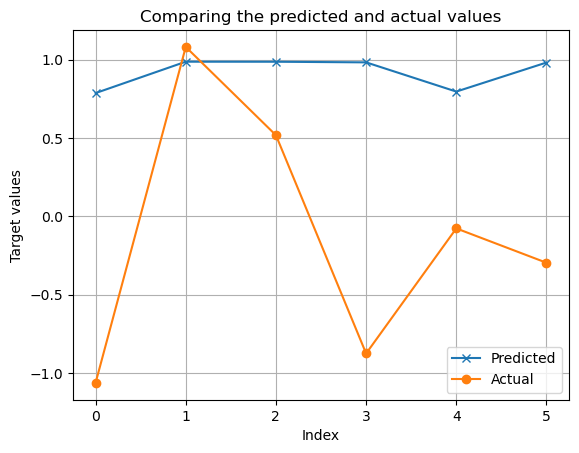

In [179]:
plot_data(data7)

In [180]:
data8=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'elu',y,x)
        data8.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2527 - mean_absolute_error: 0.9485
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2553 - mean_absolute_error: 0.8862
Epoch 10/10
1/1 [===========

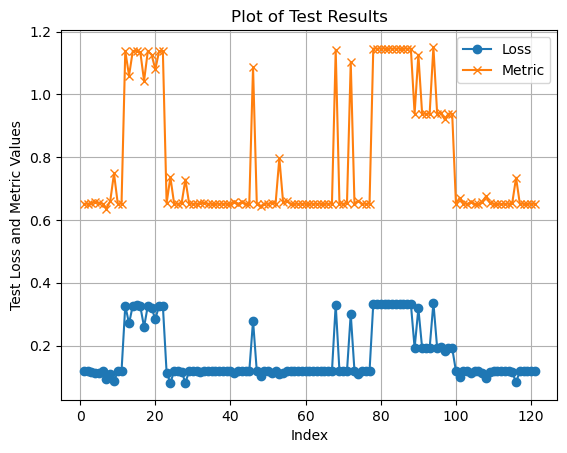

Activation functions: elu, relu, elu
Loss function: 0.09485066682100296 and metric: 0.6364086866378784
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


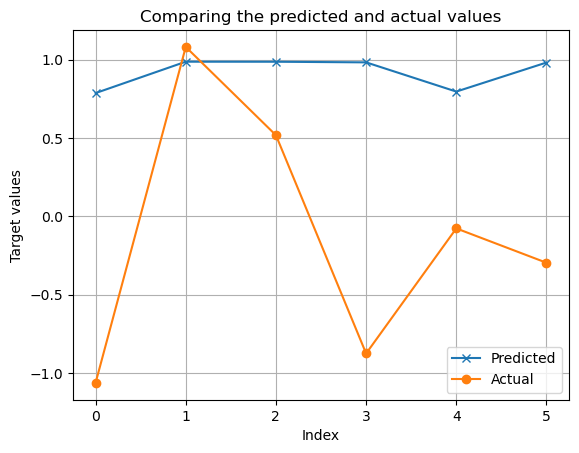

In [181]:
plot_data(data8)

In [182]:
data9=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'log_softmax',y,x)
        data9.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1943 - mean_absolute_error: 0.8294
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2385 - mean_absolute_error: 0.8942
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2322 - mean_absolute_error: 0.9011
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2275 - mean_absolute_error: 0.9038
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2239 - mean_absolute_error: 0.9054
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2207 - mean_absolute_error: 0.9074
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2179 - mean_absolute_error: 0.9068
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2155 - mean_absolute_error: 0.9091
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2132 - mean_absolute_error: 0.9109
Epoch 10/10
1/1 [===========

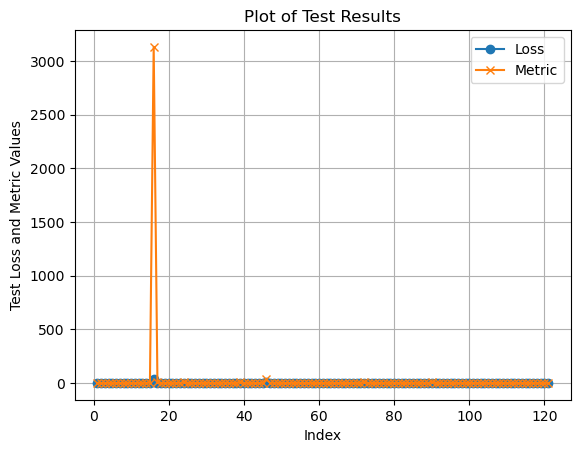

Activation functions: log_softmax, tanh, linear
Loss function: 0.11844836920499802 and metric: 0.6343433260917664
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


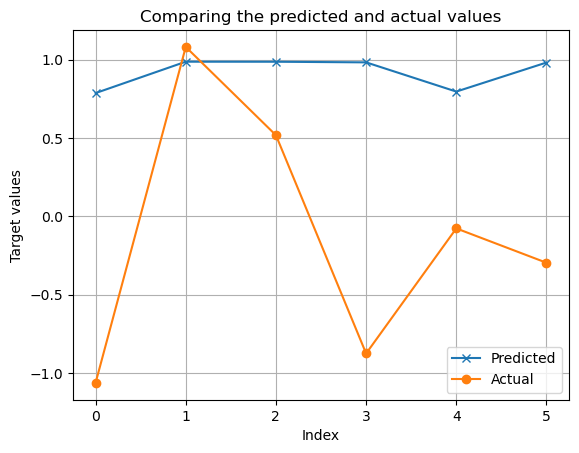

In [183]:
plot_data(data9)

In [186]:
data10=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.008,'softsign',y,x)
        data10.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1997 - mean_absolute_error: 0.7871
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2533 - mean_absolute_error: 0.8876
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2525 - mean_absolute_error: 0.8877
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2518 - mean_absolute_error: 0.8880
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2513 - mean_absolute_error: 0.8885
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2507 - mean_absolute_error: 0.8886
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2503 - mean_absolute_error: 0.8890
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2499 - mean_absolute_error: 0.8891
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2495 - mean_absolute_error: 0.8893
Epoch 10/10
1/1 [===========

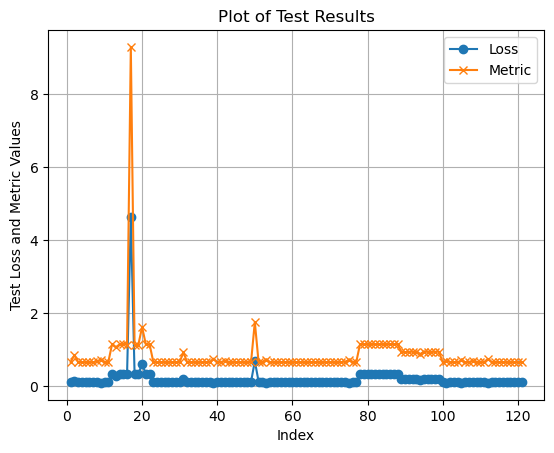

Activation functions: softsign, leaky_relu, elu
Loss function: 0.11844836920499802 and metric: 0.6516027450561523
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


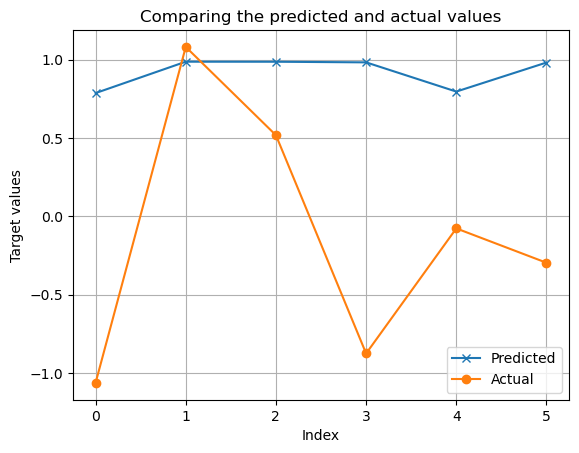

In [187]:
plot_data(data10)

In [188]:
data11=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'linear',y,x)
        data11.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2055 - mean_absolute_error: 0.8190
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2523 - mean_absolute_error: 0.8869
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2516 - mean_absolute_error: 0.8868
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2509 - mean_absolute_error: 0.8874
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2503 - mean_absolute_error: 0.8877
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2498 - mean_absolute_error: 0.8878
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2493 - mean_absolute_error: 0.8880
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2489 - mean_absolute_error: 0.8881
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2484 - mean_absolute_error: 0.8883
Epoch 10/10
1/1 [===========

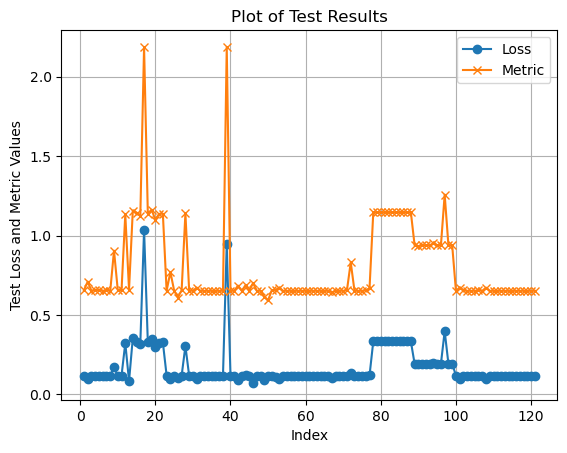

Activation functions: linear, log_softmax, linear
Loss function: 0.11844836920499802 and metric: 0.5918002724647522
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


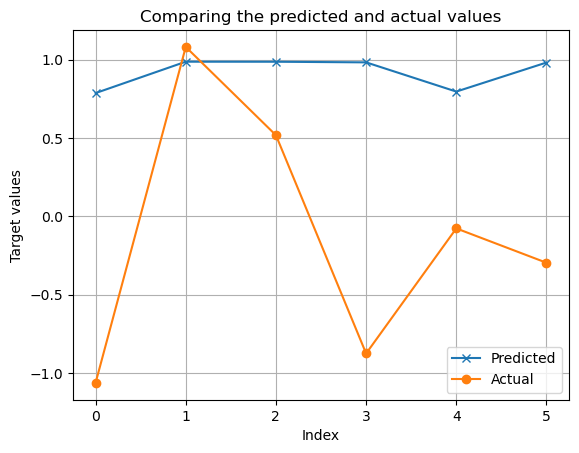

In [189]:
plot_data(data11)

# Changing Optimiser to Adam and scaled data

In [191]:
data12=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'linear',y,x)
        data12.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3167 - mean_absolute_error: 1.0486
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3143 - mean_absolute_error: 1.0431
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3131 - mean_absolute_error: 1.0395
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3104 - mean_absolute_error: 1.0339
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3088 - mean_absolute_error: 1.0311
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3079 - mean_absolute_error: 1.0296
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3062 - mean_absolute_error: 1.0273
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3039 - mean_absolute_error: 1.0234
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3025 - mean_absolute_error: 1.0209
Epoch 10/10
1/1 [===========

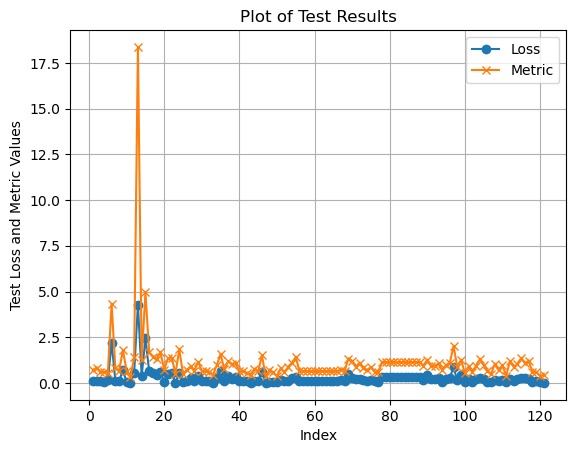

Activation functions: linear, tanh, elu
Loss function: 0.002017197897657752 and metric: 0.30425944924354553
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


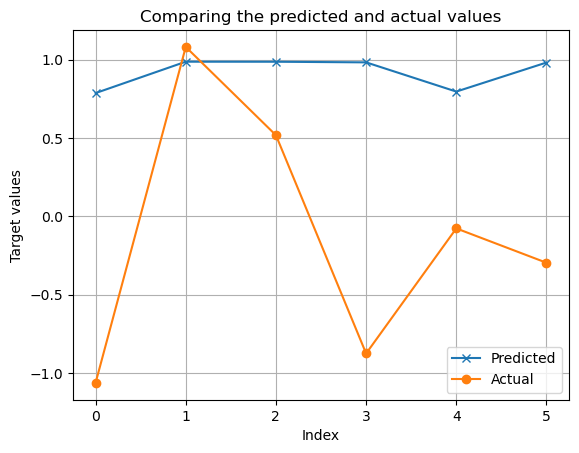

In [192]:
plot_data(data12)

In [195]:
data13=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'elu',y,x)
        data13.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2229 - mean_absolute_error: 0.9909
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2204 - mean_absolute_error: 0.9881
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2183 - mean_absolute_error: 0.9853
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2170 - mean_absolute_error: 0.9827
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2150 - mean_absolute_error: 0.9805
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2128 - mean_absolute_error: 0.9772
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2110 - mean_absolute_error: 0.9749
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2098 - mean_absolute_error: 0.9730
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2086 - mean_absolute_error: 0.9707
Epoch 10/10
1/1 [===========

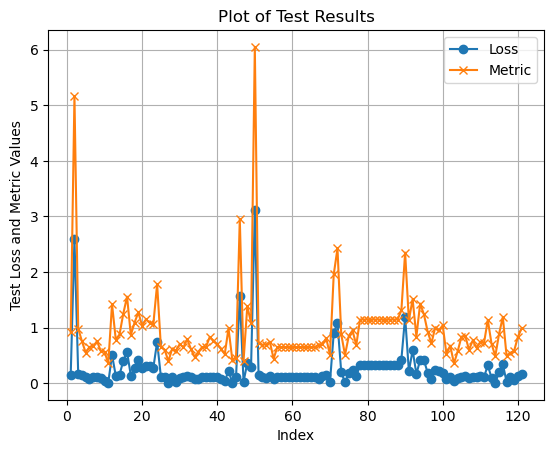

Activation functions: elu, leaky_relu, softsign
Loss function: 0.0399482361972332 and metric: 0.35593435168266296
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


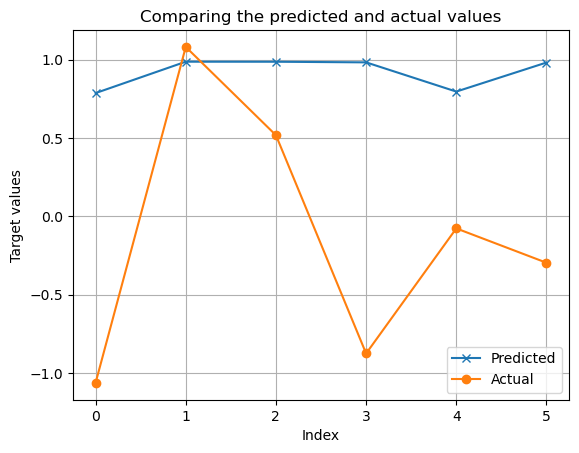

In [196]:
plot_data(data13)

In [197]:
data14=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'elu',y,x)
        data14.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1734 - mean_absolute_error: 0.7116
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1714 - mean_absolute_error: 0.7092
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1702 - mean_absolute_error: 0.7066
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1686 - mean_absolute_error: 0.7046
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1670 - mean_absolute_error: 0.7021
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1659 - mean_absolute_error: 0.6995
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1646 - mean_absolute_error: 0.6976
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1634 - mean_absolute_error: 0.6950
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1621 - mean_absolute_error: 0.6926
Epoch 10/10
1/1 [===========

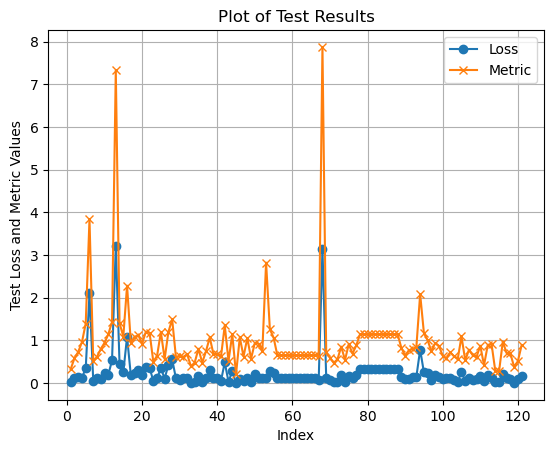

Activation functions: elu, elu, linear
Loss function: 0.0065973736345767975 and metric: 0.21259482204914093
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


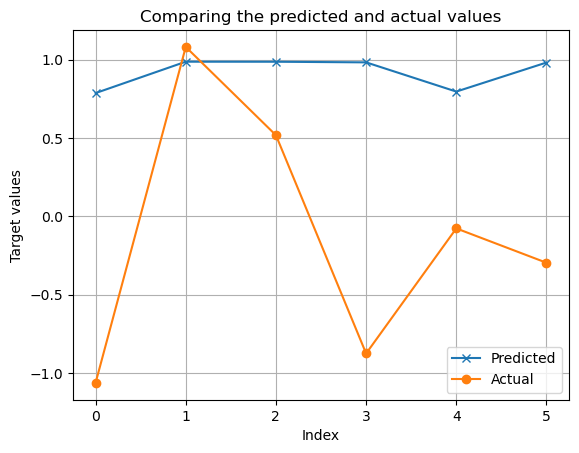

In [198]:
plot_data(data14)

In [199]:
data15=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'exponential',y,x)
        data15.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2019 - mean_absolute_error: 0.8446
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2014 - mean_absolute_error: 0.8423
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2013 - mean_absolute_error: 0.8374
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2005 - mean_absolute_error: 0.8310
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2002 - mean_absolute_error: 0.8271
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1999 - mean_absolute_error: 0.8242
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1997 - mean_absolute_error: 0.8191
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1992 - mean_absolute_error: 0.8154
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.1989 - mean_absolute_error: 0.8113
Epoch 10/10
1/1 [===========

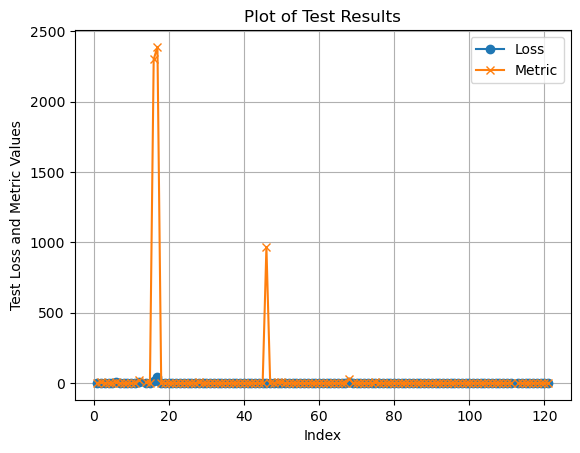

Activation functions: exponential, relu, elu
Loss function: 0.0029196280520409346 and metric: 0.3074180483818054
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


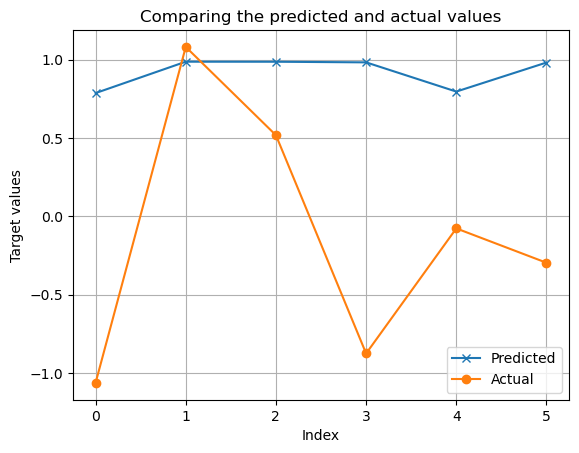

In [200]:
plot_data(data15)

In [201]:
data16=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'relu',y,x)
        data16.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2685 - mean_absolute_error: 1.0016
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2677 - mean_absolute_error: 0.9993
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2670 - mean_absolute_error: 0.9969
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2664 - mean_absolute_error: 0.9951
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2660 - mean_absolute_error: 0.9935
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2653 - mean_absolute_error: 0.9913
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2648 - mean_absolute_error: 0.9889
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2643 - mean_absolute_error: 0.9866
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2637 - mean_absolute_error: 0.9842
Epoch 10/10
1/1 [===========

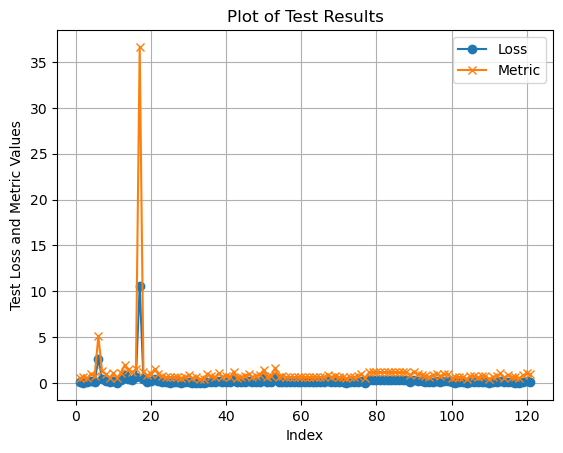

Activation functions: relu, linear, softsign
Loss function: 0.006681893020868301 and metric: 0.424967497587204
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


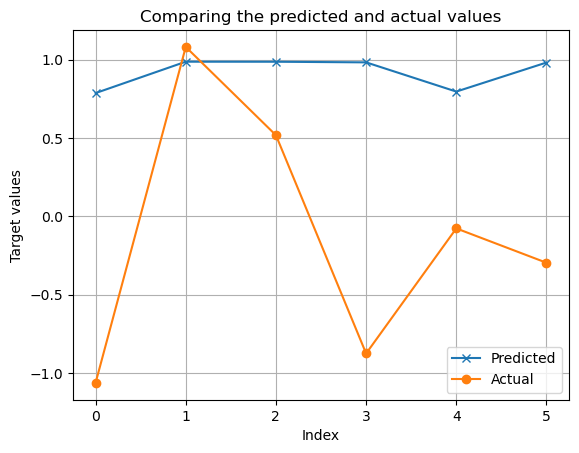

In [202]:
plot_data(data16)

In [203]:
data17=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'elu',y,x)
        data17.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 0.2252 - mean_absolute_error: 0.9917
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.2246 - mean_absolute_error: 0.9908
Epoch 3/5
7/7 [==============================] - 0s 2ms/step - loss: 0.2240 - mean_absolute_error: 0.9900
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.2232 - mean_absolute_error: 0.9889
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 0.1142 - mean_absolute_error: 0.7012
(14, 16)
Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 0.2385 - mean_absolute_error: 0.8930
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 0.2382 - mean_absolute_error: 0.8923
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.2378 - mean_absolute_error: 0.8916
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.2374 - mean_absolute_error: 0.8910
Epoch 5/5
1/1 [============

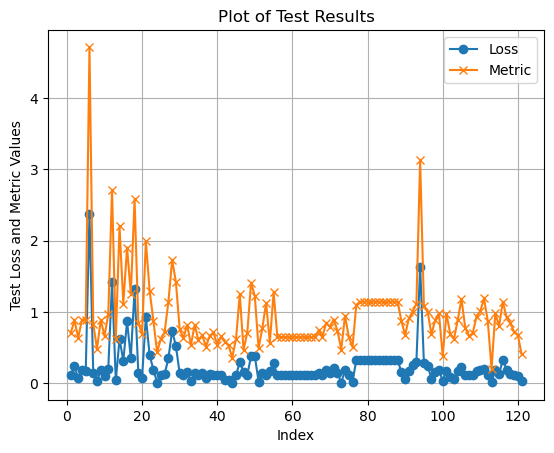

Activation functions: elu, gelu, tanh
Loss function: 0.0173047948628664 and metric: 0.2031204104423523
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


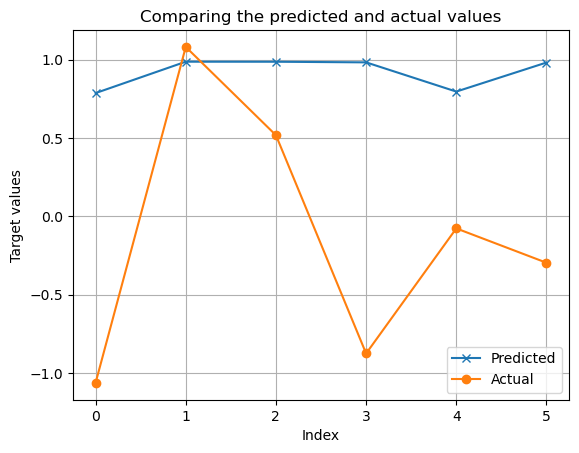

In [204]:
plot_data(data17)

In [205]:
data18=[]

array =['elu','exponential','gelu','leaky_relu','linear','log_softmax','relu','softmax','softplus','softsign','tanh']
for x in array:
    for y in array:
        first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',10,0.0001,'tanh',y,x)
        data18.append([first,second,third,loss,mse,losst,mset,y_pred,y_test])

(14, 16)
Epoch 1/10
7/7 [==============================] - 0s 1ms/step - loss: 0.4029 - mean_absolute_error: 1.4147
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3962 - mean_absolute_error: 1.4026
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3891 - mean_absolute_error: 1.3903
Epoch 4/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3832 - mean_absolute_error: 1.3795
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3770 - mean_absolute_error: 1.3679
Epoch 6/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3713 - mean_absolute_error: 1.3571
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3647 - mean_absolute_error: 1.3451
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3589 - mean_absolute_error: 1.3341
Epoch 9/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3534 - mean_absolute_error: 1.3232
Epoch 10/10
1/1 [===========

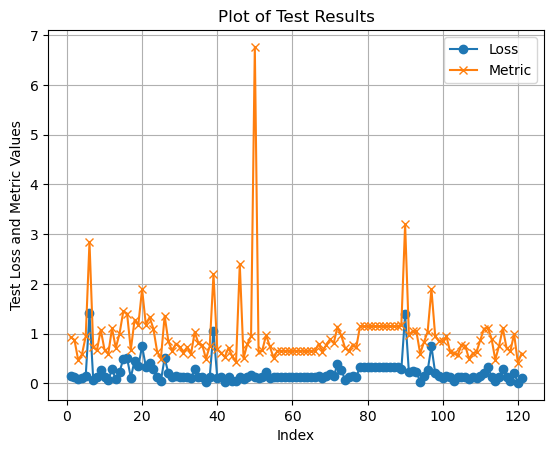

Activation functions: tanh, softsign, tanh
Loss function: 0.006953630596399307 and metric: 0.41420242190361023
Actual value: [-1.0635056   1.0807221   0.5172754  -0.87569004 -0.07747392 -0.2965921 ]


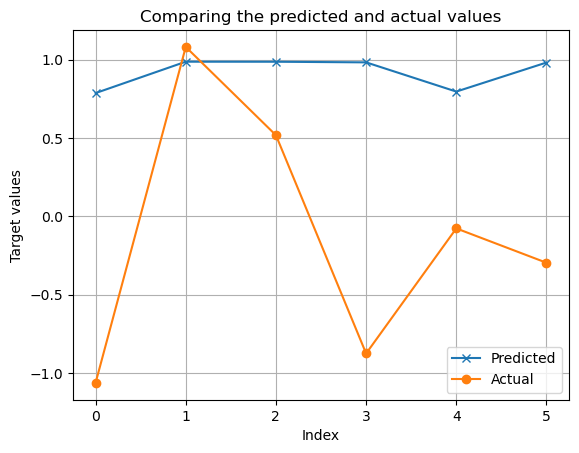

In [206]:
plot_data(data18)

In [385]:
def model_data_call(data,epochs,adam,act1,act2):
        feature = df.loc[(df['census_year']<2022),:].drop(columns=['census_year','New_cafe'])
        feature['clue_small_area'] = le.fit_transform(feature['clue_small_area'])
        feature.iloc[:,1:] = scaler.fit_transform(feature.iloc[:,1:])
        target = df.loc[(df['census_year']< 2022),'New_cafe']
        feature = feature.astype(np.float32)
        target = target.astype(np.float32)
    # Splitting the data into training and testing
        x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size =0.2, random_state = 42 )
        model = models.Sequential([
            layers.Dense(5, activation=act1, input_shape=(23, )),
            #layers.Dense(5, activation =act2),
            #layers.Dense(2, activation =act3),
            layers.Dense(1, activation=act2)])
    # Compiling the data
        model.compile(
            optimizer= tf.keras.optimizers.Adam(adam),
            loss= tf.keras.losses.MeanAbsoluteError(),
            metrics= [tf.keras.metrics.Accuracy()],
            )
        int_weights = model.get_weights()

        network = model.fit(
            x = x_train,
            y = y_train,
            batch_size = 1,
            epochs=epochs
        )
        print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')
        print(f'Model building')
        print("Model evaluation:")
        print('Training:')
        loss, mse = model.evaluate(x_train, y_train)
        print(f'Final Loss: {loss:.4f}, Mean Squared Error: {mse:.4f}')
        print('Test data:')
        losst, mset = model.evaluate(x_test, y_test)
        print(f'Final Loss: {losst:.4f}, Mean Squared Error: {mset:.4f}')
        model.summary()

        tf.keras.utils.plot_model(model, show_shapes = True)
        return network

In [238]:
first,second,third,loss,mse,losst,mset,y_pred,y_test = model_call(df,'Carlton',600,0.007,'linear','exponential','linear')

(14, 16)
Epoch 1/600
7/7 [==============================] - 0s 1ms/step - loss: 0.2029 - mean_absolute_error: 6.9162
Epoch 2/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0542 - mean_absolute_error: 7.0989
Epoch 3/600
7/7 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_absolute_error: 11.1517
Epoch 4/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0451 - mean_absolute_error: 8.5439
Epoch 5/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0321 - mean_absolute_error: 8.7214
Epoch 6/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0274 - mean_absolute_error: 10.4264
Epoch 7/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0207 - mean_absolute_error: 12.4719
Epoch 8/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0174 - mean_absolute_error: 12.8953
Epoch 9/600
7/7 [==============================] - 0s 2ms/step - loss: 0.0155 - mean_absolute_error: 13.1495
Epoch 10/600
7

In [239]:
print(y_pred)
print(y_test)
print(losst)
print(mset)

[[0.7861125 ]
 [0.9864165 ]
 [0.98612934]
 [0.982183  ]
 [0.7957193 ]
 [0.9810899 ]]
0     -1.063506
221    1.080722
195    0.517275
13    -0.875690
104   -0.077474
65    -0.296592
Name: accommodation_and_food_services, dtype: float32
0.3756854236125946
1.777643084526062


In [218]:
y_test

0     -1.063506
221    1.080722
195    0.517275
13    -0.875690
104   -0.077474
65    -0.296592
Name: accommodation_and_food_services, dtype: float32